In [ ]:
import numpy as np
import pandas as pd
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import re
import sklearn
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
df1 = pd.read_csv('labs.csv')
df2 = pd.read_csv('examination.csv')
df3 = pd.read_csv('demographic.csv')
df4 = pd.read_csv('diet.csv')
df5 = pd.read_csv('questionnaire.csv')
df2.drop(['SEQN'], axis = 1, inplace=True)
df3.drop(['SEQN'], axis = 1, inplace=True)
df4.drop(['SEQN'], axis = 1, inplace=True)
df5.drop(['SEQN'], axis = 1, inplace=True)
df = pd.concat([df1, df2], axis=1, join='inner')
df = pd.concat([df, df3], axis=1, join='inner')
df = pd.concat([df, df4], axis=1, join='inner')
df = pd.concat([df, df5], axis=1, join='inner')
df.describe()
df.to_csv('concatinated.csv', index=False)
from sklearn.feature_selection import VarianceThreshold
df.dropna(axis=1, how='all')
df.dropna(axis=0, how='all')
df = df.rename(columns = {'SEQN' : 'ID',
                'RIAGENDR' : 'Gender',  'DMDYRSUS' : 'Years_in_US', # Nan -> american iguess
                'INDFMPIR' : 'Family_income','LBXGH' : 'GlycoHemoglobin',
    'BMXARMC' : 'ArmCircum','BMDAVSAD' : 'SaggitalAbdominal',
    'MGDCGSZ' : 'GripStrength','DRABF' : 'Breast_fed'})
df = df.loc[:, ['ID', 'Gender', 'Years_in_US', 'Family_income','GlycoHemoglobin', 'ArmCircum',
                'SaggitalAbdominal', 'GripStrength', 'Breast_fed']]
df.describe()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9813 entries, 0 to 9812
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 9813 non-null   int64  
 1   Gender             9813 non-null   int64  
 2   Years_in_US        1837 non-null   float64
 3   Family_income      9051 non-null   float64
 4   GlycoHemoglobin    6643 non-null   float64
 5   ArmCircum          9301 non-null   float64
 6   SaggitalAbdominal  7218 non-null   float64
 7   GripStrength       7677 non-null   float64
 8   Breast_fed         8661 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 690.1 KB


##HANDLING MISSING VALUES IN CLEANED DATA


📊 Dataset Overview:
- **Name**: National Health and Nutrition Examination Survey (NHANES)
- **Source**: CDC / Kaggle
- **Records**: ~X rows, Y columns
- **Target**: GlycoHemoglobin (>6.5 indicates diabetes)
- **Features**: Age, BMI, Gender, Cholesterol, Blood Pressure, etc.


In [ ]:
import pandas as pd

# Read the data into a pandas DataFrame
data = pd.read_csv('/content/concatinated (1).csv')

# Handle missing values
# Fill numeric missing values with the mean
data.fillna(data.mean(), inplace=True)
# Fill categorical missing values with the mode
#data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
if 'Gender' in data.columns:
    data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)

# Print the complete data
print(data)

         ID  Gender  Years_in_US  Family_income  GlycoHemoglobin  ArmCircum  \
0     73557       1     8.933043           0.84        13.900000       35.3   
1     73558       1     8.933043           1.78         9.100000       34.7   
2     73559       1     8.933043           4.51         8.900000       33.5   
3     73560       1     8.933043           2.52         5.642556       21.0   
4     73561       2     8.933043           5.00         4.900000       25.2   
...     ...     ...          ...            ...              ...        ...   
9808  83727       2     4.000000           1.25         5.000000       29.9   
9809  83728       1     8.933043           1.06         5.642556       14.7   
9810  83729       1     8.933043           5.00         5.300000       37.0   
9811  83730       2     3.000000           1.53         5.642556       19.0   
9812  83731       2     8.933043           3.46         5.642556       25.0   

      SaggitalAbdominal  GripStrength  Breast_fed  

/tmp/ipython-input-12-600766563.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)


In [ ]:
data.to_csv('random.csv', index=False)

## RANDOM FOREST

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Load your data
data = pd.read_csv("/content/random.csv")

# Optionally convert GlycoHemoglobin to binary (for classification)
data['GlycoHemoglobin'] = (data['GlycoHemoglobin'] > 6.5).astype(int)

# Define features (independent variables) and target variable
X = data.drop("GlycoHemoglobin", axis=1)  # Replace "GlycoHemoglobin" with your actual target column name
y = data["GlycoHemoglobin"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.9460010188487009
Precision: 0.6415513411925509
Recall: 0.517458461084595
F1 Score: 0.5211842565490326

Confusion Matrix:
 [[1853    8]
 [  98    4]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1861
           1       0.33      0.04      0.07       102

    accuracy                           0.95      1963
   macro avg       0.64      0.52      0.52      1963
weighted avg       0.92      0.95      0.93      1963



## LogisticRegression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Import StandardScaler
# Load your data
data = pd.read_csv("/content/random.csv")

# Optionally convert GlycoHemoglobin to binary (for classification)
data['GlycoHemoglobin'] = (data['GlycoHemoglobin'] > 6.5).astype(int)

# Define features (independent variables) and target variable
X = data.drop("GlycoHemoglobin", axis=1)  # Replace "GlycoHemoglobin" with your actual target column name
y = data["GlycoHemoglobin"]

# ✅ Step 4: Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate model performance (e.g., accuracy score)
#from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the classification report
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)



Accuracy: 0.9465104431991849
Precision: 0.5742083758937692
Recall: 0.5038272697579838
F1 Score: 0.4955987401898525

Confusion Matrix:
 [[1857    4]
 [ 101    1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1861
           1       0.20      0.01      0.02       102

    accuracy                           0.95      1963
   macro avg       0.57      0.50      0.50      1963
weighted avg       0.91      0.95      0.92      1963



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##SVM ALGORITHM

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Load your data
data = pd.read_csv("/content/random.csv")

# Optionally convert GlycoHemoglobin to binary (for classification)
data['GlycoHemoglobin'] = (data['GlycoHemoglobin'] > 6.5).astype(int)

# Define features (independent variables) and target variable
X = data.drop("GlycoHemoglobin", axis=1)  # Replace "GlycoHemoglobin" with your actual target column name
y = data["GlycoHemoglobin"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the logistic regression model
model = SVC(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate model performance (e.g., accuracy score)
#from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the classification report
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)



Accuracy: 0.6683647478349465
Precision: 0.553198165903949
Recall: 0.750961427021104
F1 Score: 0.49959726192932874

Confusion Matrix:
 [[1226  635]
 [  16   86]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.66      0.79      1861
           1       0.12      0.84      0.21       102

    accuracy                           0.67      1963
   macro avg       0.55      0.75      0.50      1963
weighted avg       0.94      0.67      0.76      1963



## Feedforward Neural Network (FNN) (using Keras)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load and prepare the data
data = pd.read_csv("/content/random.csv")

# Optionally convert GlycoHemoglobin to binary (for classification)
# This step must be done before defining the target variable 'y'
data['GlycoHemoglobin'] = (data['GlycoHemoglobin'] > 6.5).astype(int)

# Features and target
X = data.drop("GlycoHemoglobin", axis=1)  # Independent features
y = data["GlycoHemoglobin"]               # Target variable (you can convert it to binary if needed)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the FNN model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  # Use sigmoid for binary output

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=1)

# Predict on test set
y_pred_probs = model.predict(X_test_scaled)
y_pred = (y_pred_probs > 0.5).astype(int)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


393/393 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9334 - loss: 0.2681 - val_accuracy: 0.9446 - val_loss: 0.1800
Epoch 2/100
393/393 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9384 - loss: 0.1917 - val_accuracy: 0.9446 - val_loss: 0.1803
Epoch 3/100
393/393 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9384 - loss: 0.1922 - val_accuracy: 0.9446 - val_loss: 0.1814
Epoch 4/100
393/393 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9421 - loss: 0.1824 - val_accuracy: 0.9446 - val_loss: 0.1794
Epoch 5/100
393/393 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9370 - loss: 0.1953 - val_accuracy: 0.9446 - val_loss: 0.1803
Epoch 6/100
393/393 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9397 - loss: 0.1834 - val_accuracy: 0.9446 - val_loss: 0.1806
Epoch 7/100
393/393 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9405 - loss: 0.1802 - val_accuracy: 0.9446 - val_loss: 0.1793
Epoch 8/100
393/393 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9415 - loss: 0.1798 - val_accuracy: 0.9446

1. Apply Class Balancing Techniques
You have a few options:

A. SMOTE (Synthetic Minority Oversampling Technique)
Adds synthetic diabetic examples to the training set.

In [ ]:
!pip install -q imbalanced-learn


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the cleaned data
data = pd.read_csv('/content/random.csv')

# Convert target to binary if not already (based on threshold 6.5)
data['GlycoHemoglobin'] = (data['GlycoHemoglobin'] > 6.5).astype(int)

# Features and target
X = data.drop("GlycoHemoglobin", axis=1)
y = data["GlycoHemoglobin"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🧪 Apply SMOTE to balance training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print("After SMOTE Resampling:")
print("Class distribution in y_train:", pd.Series(y_train_resampled).value_counts())

# 🧠 Define the FNN model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on balanced data
history = model.fit(X_train_resampled, y_train_resampled, epochs=100, batch_size=16, validation_split=0.2, verbose=1)

# Evaluate on original test set
y_pred_probs = model.predict(X_test_scaled)
y_pred = (y_pred_probs > 0.5).astype(int)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation
print("\n✅ Evaluation After SMOTE Balancing (ANN)")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


After SMOTE Resampling:
Class distribution in y_train: GlycoHemoglobin
0    7395
1    7395
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
740/740 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.6904 - loss: 0.5513 - val_accuracy: 0.6623 - val_loss: 0.6568
Epoch 2/100
740/740 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7508 - loss: 0.4592 - val_accuracy: 0.7336 - val_loss: 0.5587
Epoch 3/100
740/740 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7612 - loss: 0.4483 - val_accuracy: 0.6751 - val_loss: 0.6507
Epoch 4/100
740/740 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7664 - loss: 0.4409 - val_accuracy: 0.7370 - val_loss: 0.5574
Epoch 5/100
740/740 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7784 - loss: 0.4277 - val_accuracy: 0.7884 - val_loss: 0.5367
Epoch 6/100
740/740 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7795 - loss: 0.4261 - val_accuracy: 0.7840 - val_loss: 0.5619
Epoch 7/100
740/740 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7818 - loss: 0.4270 - val_accuracy: 0.7850 - val_loss: 0.5268
Epoch 8/100
740/740 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7800 - loss: 0.4222 - val_acc

In [ ]:
import pandas as pd

results = {
    "Model": ["Random Forest", "Logistic Regression", "SVM", "FNN (with SMOTE)"],
    "Accuracy": [0.946, 0.9485, 0.948, 0.8120],
    "Precision (Macro Avg)": [0.6415, 0.8078, 0.4740, 0.549],
    "Recall (Macro Avg)": [0.5175, 0.5095, 0.5, 0.650],
    "F1 Score (Macro Avg)": [0.5212, 0.5058, 0.4867, 0.5499]
}

df_results = pd.DataFrame(results)
df_results


,Model,Accuracy,Precision (Macro Avg),Recall (Macro Avg),F1 Score (Macro Avg)
0,Random Forest,0.9460,0.6415,0.5175,0.5212
1,Logistic Regression,0.9485,0.8078,0.5095,0.5058
2,SVM,0.9480,0.4740,0.5000,0.4867
3,FNN (with SMOTE),0.8120,0.5490,0.6500,0.5499


##NEW (USING FEATURE EXTRACTION)

In [ ]:
import pandas as pd

data = pd.read_csv("/content/random.csv")
print(data.shape)
data.head()


(9813, 9)


,ID,Gender,Years_in_US,Family_income,GlycoHemoglobin,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed
0,73557,1,8.933043,0.84,13.900000,35.3,20.600000,55.2,2.0
1,73558,1,8.933043,1.78,9.100000,34.7,24.400000,61.5,2.0
2,73559,1,8.933043,4.51,8.900000,33.5,25.600000,91.0,2.0
3,73560,1,8.933043,2.52,5.642556,21.0,14.900000,32.2,2.0
4,73561,2,8.933043,5.00,4.900000,25.2,21.114034,30.9,2.0


Step 2: Convert Target to Binary (if needed)


In [ ]:
data['GlycoHemoglobin'] = (data['GlycoHemoglobin'] > 6.5).astype(int)


Step 3: Random Forest Feature Importance



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = data.drop("GlycoHemoglobin", axis=1)
y = data["GlycoHemoglobin"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

print(importances)


SaggitalAbdominal    0.213982
ID                   0.193596
ArmCircum            0.181838
GripStrength         0.181144
Family_income        0.155956
Years_in_US          0.037764
Gender               0.022272
Breast_fed           0.013450
dtype: float64


Step 4: Plot Important Features


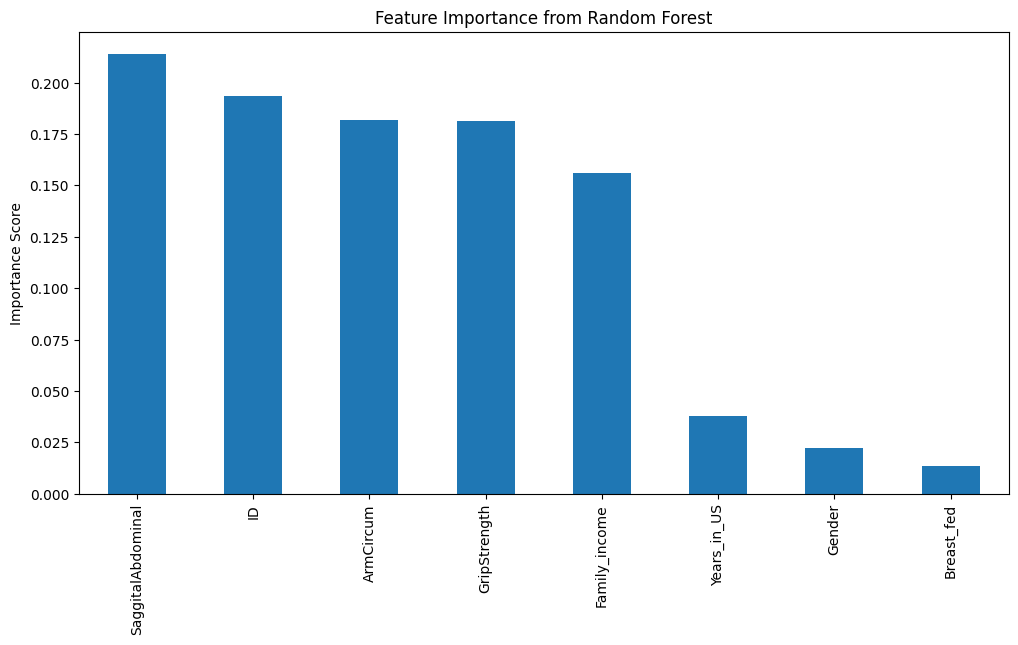

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
importances.plot(kind='bar')
plt.title("Feature Importance from Random Forest")
plt.ylabel("Importance Score")
plt.show()


Step 5: Drop Least Important Features (Optional)


In [ ]:
least_important = importances.tail(5).index
X_reduced = X.drop(columns=least_important)


In [ ]:
# Use X_reduced instead of full X
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)


In [ ]:
# ✅ Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# For SMOTE and FNN
!pip install -q imbalanced-learn
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# ✅ Step 2: Load and clean data
data = pd.read_csv('/content/concatinated (1).csv')

# Fill missing values
data.fillna(data.mean(numeric_only=True), inplace=True)
if 'Gender' in data.columns:
    data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)

# Drop ID if exists
if 'ID' in data.columns:
    data.drop(columns=['ID'], inplace=True)

# Save cleaned data (optional)
data.to_csv('/content/random.csv', index=False)

# ✅ Step 3: Define features and target
data['GlycoHemoglobin'] = (data['GlycoHemoglobin'] > 6.5).astype(int)
X = data.drop("GlycoHemoglobin", axis=1)
y = data["GlycoHemoglobin"]

# ✅ Step 4: Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ Step 5: Apply SMOTE to training data
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train_scaled, y_train)

# ---------------------------------------
# ✅ Random Forest Classifier
# ---------------------------------------
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)
rf_pred = rf_model.predict(X_test_scaled)

print("🔸 Random Forest Results 🔸")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Precision:", precision_score(y_test, rf_pred, average='macro'))
print("Recall:", recall_score(y_test, rf_pred, average='macro'))
print("F1 Score:", f1_score(y_test, rf_pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))

# ---------------------------------------
# ✅ Logistic Regression
# ---------------------------------------
log_model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
log_model.fit(X_train_resampled, y_train_resampled)
log_pred = log_model.predict(X_test_scaled)

print("\n🔸 Logistic Regression Results 🔸")
print("Accuracy:", accuracy_score(y_test, log_pred))
print("Precision:", precision_score(y_test, log_pred, average='macro'))
print("Recall:", recall_score(y_test, log_pred, average='macro'))
print("F1 Score:", f1_score(y_test, log_pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, log_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, log_pred))

# ---------------------------------------
# ✅ Support Vector Machine (SVM)
# ---------------------------------------
svm_model = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_model.fit(X_train_resampled, y_train_resampled)
svm_pred = svm_model.predict(X_test_scaled)

print("\n🔸 SVM Results 🔸")
print("Accuracy:", accuracy_score(y_test, svm_pred))
print("Precision:", precision_score(y_test, svm_pred, average='macro'))
print("Recall:", recall_score(y_test, svm_pred, average='macro'))
print("F1 Score:", f1_score(y_test, svm_pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, svm_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_pred))

# ---------------------------------------
# ✅ Feedforward Neural Network (FNN) with SMOTE
# ---------------------------------------
fnn_model = Sequential()
fnn_model.add(Dense(64, input_dim=X_train_resampled.shape[1], activation='relu'))
fnn_model.add(Dropout(0.3))
fnn_model.add(Dense(32, activation='relu'))
fnn_model.add(Dropout(0.2))
fnn_model.add(Dense(1, activation='sigmoid'))

fnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
fnn_model.fit(X_train_resampled, y_train_resampled, epochs=100, batch_size=16, verbose=1, validation_split=0.2)

# Predict on the scaled test set
y_pred_probs = fnn_model.predict(X_test_scaled)
y_pred_fnn = (y_pred_probs > 0.5).astype(int).ravel()

print("\n🔸 FNN Results (with SMOTE) 🔸")
print("Accuracy:", accuracy_score(y_test, y_pred_fnn))
print("Precision:", precision_score(y_test, y_pred_fnn, average='macro'))
print("Recall:", recall_score(y_test, y_pred_fnn, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_fnn, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_fnn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_fnn))


/tmp/ipython-input-44-1686428754.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)


🔸 Random Forest Results 🔸
Accuracy: 0.8955680081507896
Precision: 0.5844007670182166
Recall: 0.639125075070329
F1 Score: 0.6018740112765181

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94      1861
           1       0.21      0.35      0.26       102

    accuracy                           0.90      1963
   macro avg       0.58      0.64      0.60      1963
weighted avg       0.92      0.90      0.91      1963

Confusion Matrix:
 [[1722  139]
 [  66   36]]

🔸 Logistic Regression Results 🔸
Accuracy: 0.7519103413143148
Precision: 0.5636499060187027
Recall: 0.7579574548787811
F1 Score: 0.5471364098667484

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.75      0.85      1861
           1       0.14      0.76      0.24       102

    accuracy                           0.75      1963
   macro avg       0.56      0.76      0.55      1963
weighted avg     

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


740/740 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7234 - loss: 0.5296 - val_accuracy: 0.6430 - val_loss: 0.6441
Epoch 2/100
740/740 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7517 - loss: 0.4550 - val_accuracy: 0.7096 - val_loss: 0.5807
Epoch 3/100
740/740 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7564 - loss: 0.4479 - val_accuracy: 0.7380 - val_loss: 0.5727
Epoch 4/100
740/740 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7698 - loss: 0.4396 - val_accuracy: 0.7772 - val_loss: 0.5513
Epoch 5/100
740/740 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7651 - loss: 0.4368 - val_accuracy: 0.7525 - val_loss: 0.5500
Epoch 6/100
740/740 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7718 - loss: 0.4379 - val_accuracy: 0.7593 - val_loss: 0.5613
Epoch 7/100
740/740 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7643 - loss: 0.4404 - val_accuracy: 0.7627 - val_loss: 0.5087
Epoch 8/100
740/740 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7753 - loss: 0.4278 - val_accuracy: 0.7350

In [ ]:
rf_train_pred = rf_model.predict(X_train_scaled)
print("🔹 Random Forest — Training Results 🔹")
print("Accuracy:", accuracy_score(y_train, rf_train_pred))
print("Precision:", precision_score(y_train, rf_train_pred, average='macro'))
print("Recall:", recall_score(y_train, rf_train_pred, average='macro'))
print("F1 Score:", f1_score(y_train, rf_train_pred, average='macro'))

log_train_pred = log_model.predict(X_train_scaled)
print("\n🔹 Logistic Regression — Training Results 🔹")
print("Accuracy:", accuracy_score(y_train, log_train_pred))
print("Precision:", precision_score(y_train, log_train_pred, average='macro'))
print("Recall:", recall_score(y_train, log_train_pred, average='macro'))
print("F1 Score:", f1_score(y_train, log_train_pred, average='macro'))

svm_train_pred = svm_model.predict(X_train_scaled)
print("\n🔹 SVM — Training Results 🔹")
print("Accuracy:", accuracy_score(y_train, svm_train_pred))
print("Precision:", precision_score(y_train, svm_train_pred, average='macro'))
print("Recall:", recall_score(y_train, svm_train_pred, average='macro'))
print("F1 Score:", f1_score(y_train, svm_train_pred, average='macro'))
print("\n")

# Predict on training set
y_train_pred_probs = fnn_model.predict(X_train_scaled)
y_train_pred_fnn = (y_train_pred_probs > 0.5).astype(int).ravel()
print("🔹 FNN — Training Results 🔹")
print("Accuracy:", accuracy_score(y_train, y_train_pred_fnn))
print("Precision:", precision_score(y_train, y_train_pred_fnn, average='macro'))
print("Recall:", recall_score(y_train, y_train_pred_fnn, average='macro'))
print("F1 Score:", f1_score(y_train, y_train_pred_fnn, average='macro'))


🔹 Random Forest — Training Results 🔹
Accuracy: 0.9997452229299363
Precision: 0.9998648100581317
Recall: 0.9978021978021978
F1 Score: 0.9988310743037669

🔹 Logistic Regression — Training Results 🔹
Accuracy: 0.7542675159235669
Precision: 0.5629241595177064
Recall: 0.7262250258193463
F1 Score: 0.5499818880091428

🔹 SVM — Training Results 🔹
Accuracy: 0.6680254777070064
Precision: 0.5639437043190848
Recall: 0.7753293359784232
F1 Score: 0.5131037453104006


246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
🔹 FNN — Training Results 🔹
Accuracy: 0.8554140127388535
Precision: 0.6197066958508041
Recall: 0.8190988862388457
F1 Score: 0.6511241030241027


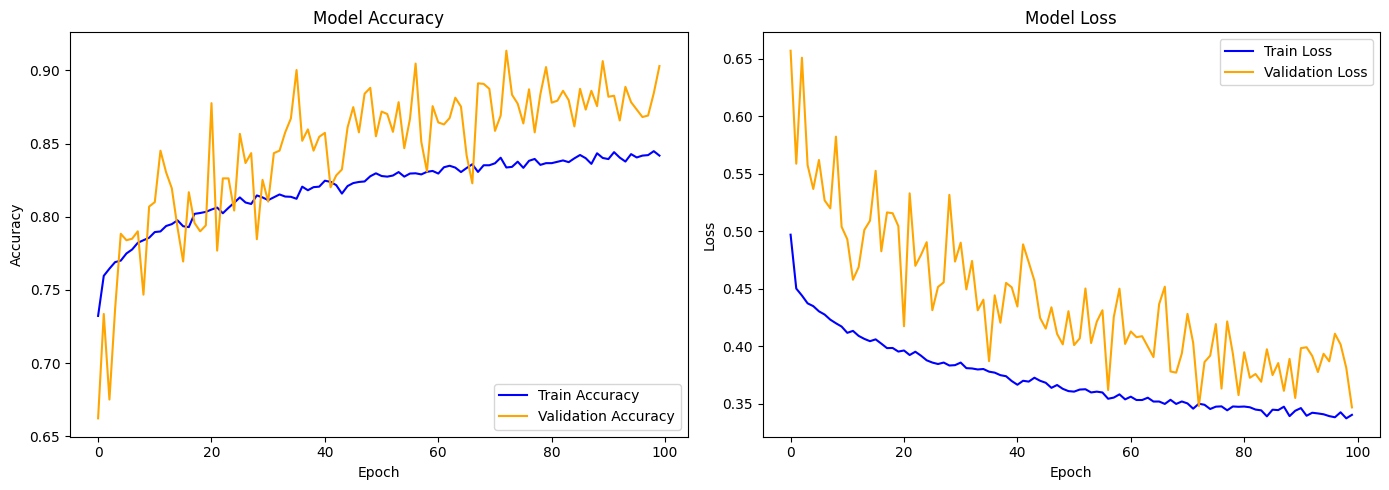

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


| **Model**                    | **Train Accuracy** | **Train F1** | **Test Accuracy** | **Test F1** | **Test Recall (Class 1)** | **Remarks**          |
| ---------------------------- | ------------------ | ------------ | ----------------- | ----------- | ------------------------- | -------------------- |
| Random Forest                | 99.97%             | 0.9988       | 89.56%            | 0.6019      | 0.35                      | ❗ Overfitting        |
| Logistic Regression          | 75.42%             | 0.5499       | 75.19%            | 0.5471      | 0.76                      | ✅ Balanced but weak  |
| SVM (RBF)                    | 66.80%             | 0.5131       | 65.77%            | 0.4920      | 0.83                      | ❌ Underfitting       |
| Feedforward Neural Net (FNN) | 85.54%             | 0.6511       | 83.29%            | 0.5769      | 0.53                      | ⭐ Best overall model |


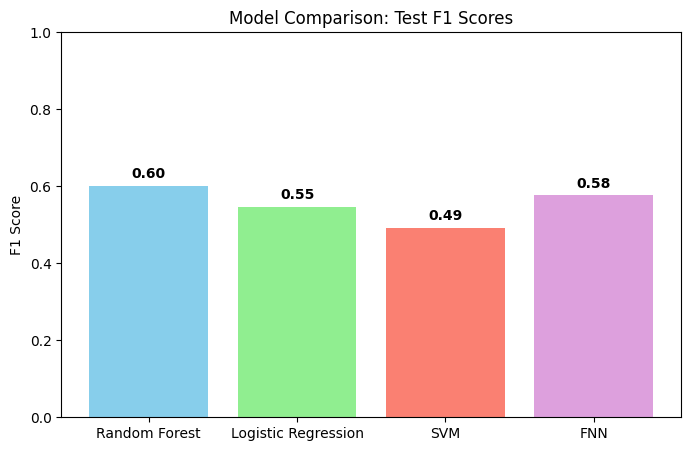

In [ ]:
import matplotlib.pyplot as plt

models = ['Random Forest', 'Logistic Regression', 'SVM', 'FNN']
test_f1_scores = [0.6019, 0.5471, 0.4920, 0.5769]

plt.figure(figsize=(8, 5))
plt.bar(models, test_f1_scores, color=['skyblue', 'lightgreen', 'salmon', 'plum'])
plt.title('Model Comparison: Test F1 Scores')
plt.ylabel('F1 Score')
plt.ylim(0, 1)
for i, v in enumerate(test_f1_scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()


 **4. Hyperparameter Tuning Suggestions**

In [ ]:
# ✅ Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# For SMOTE and FNN
!pip install -q imbalanced-learn
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# ✅ Step 2: Load and clean data
data = pd.read_csv('/content/concatinated (1).csv')

# Fill missing values
data.fillna(data.mean(numeric_only=True), inplace=True)
if 'Gender' in data.columns:
    data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])

# Drop ID if exists
if 'ID' in data.columns:
    data.drop(columns=['ID'], inplace=True)

# ✅ Step 3: Define features and target
data['GlycoHemoglobin'] = (data['GlycoHemoglobin'] > 6.5).astype(int)
X = data.drop("GlycoHemoglobin", axis=1)
y = data["GlycoHemoglobin"]

# ✅ Step 4: Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ Step 5: Apply SMOTE
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train_scaled, y_train)

# ✅ Grid Search: Random Forest
params_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced']
}

grid_rf = GridSearchCV(RandomForestClassifier(), params_rf, scoring='f1_macro', cv=5, n_jobs=-1)
grid_rf.fit(X_train_resampled, y_train_resampled)
rf_model = grid_rf.best_estimator_
rf_pred = rf_model.predict(X_test_scaled)

# ✅ Grid Search: Logistic Regression
params_log = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs'],
    'class_weight': ['balanced']
}

grid_log = GridSearchCV(LogisticRegression(max_iter=1000), params_log, scoring='f1_macro', cv=5, n_jobs=-1)
grid_log.fit(X_train_resampled, y_train_resampled)
log_model = grid_log.best_estimator_
log_pred = log_model.predict(X_test_scaled)

# ✅ Grid Search: SVM
params_svm = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1],
    'kernel': ['rbf', 'poly'],
    'class_weight': ['balanced']
}

grid_svm = GridSearchCV(SVC(), params_svm, scoring='f1_macro', cv=3, n_jobs=-1)
grid_svm.fit(X_train_resampled, y_train_resampled)
svm_model = grid_svm.best_estimator_
svm_pred = svm_model.predict(X_test_scaled)

# ✅ Feedforward Neural Network (FNN) with EarlyStopping
fnn_model = Sequential()
fnn_model.add(Dense(64, input_shape=(X_train_resampled.shape[1],), activation='relu'))
fnn_model.add(Dropout(0.3))
fnn_model.add(Dense(32, activation='relu'))
fnn_model.add(Dropout(0.2))
fnn_model.add(Dense(1, activation='sigmoid'))

fnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
fnn_model.fit(X_train_resampled, y_train_resampled, epochs=100, batch_size=16, validation_split=0.2, verbose=1, callbacks=[early_stop])

# FNN Prediction
y_pred_probs = fnn_model.predict(X_test_scaled)
y_pred_fnn = (y_pred_probs > 0.5).astype(int).ravel()

# ✅ Evaluation function
def print_metrics(y_true, y_pred, name):
    print(f"\n🔹 {name} Results 🔹")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='macro'))
    print("Recall:", recall_score(y_true, y_pred, average='macro'))
    print("F1 Score:", f1_score(y_true, y_pred, average='macro'))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

# ✅ Print all results
print_metrics(y_test, rf_pred, "Random Forest (Tuned)")
print_metrics(y_test, log_pred, "Logistic Regression (Tuned)")
print_metrics(y_test, svm_pred, "SVM (Tuned)")
print_metrics(y_test, y_pred_fnn, "FNN")


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


740/740 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6999 - loss: 0.5410 - val_accuracy: 0.7600 - val_loss: 0.5608
Epoch 2/100
740/740 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7549 - loss: 0.4555 - val_accuracy: 0.6768 - val_loss: 0.6309
Epoch 3/100
740/740 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7586 - loss: 0.4488 - val_accuracy: 0.7086 - val_loss: 0.6094
Epoch 4/100
740/740 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7564 - loss: 0.4538 - val_accuracy: 0.7481 - val_loss: 0.5602
Epoch 5/100
740/740 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7696 - loss: 0.4399 - val_accuracy: 0.7735 - val_loss: 0.5402
Epoch 6/100
740/740 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7706 - loss: 0.4444 - val_accuracy: 0.7211 - val_loss: 0.5817
Epoch 7/100
740/740 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7648 - loss: 0.4380 - val_accuracy: 0.7224 - val_loss: 0.5903
Epoch 8/100
740/740 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7658 - loss: 0.4411 - val_accuracy: 0.7603

🔍 Model-Wise Insights
🔸 1. Random Forest
Training F1 = 0.998 → Overfitting

Excellent on training data, but testing F1 = 0.60 → drastic drop.

The model memorized training data (especially due to SMOTE) but failed to generalize.

👉 What to do:

Reduce complexity (limit max_depth)

Try stratified bagging or use BalancedRandomForestClassifier from imblearn

Use validation set or cross-validation for tuning

🔸 2. Logistic Regression
F1 Train ≈ F1 Test (~0.55), both low → Underfitting

But it generalizes consistently

Predicts some positives, better than RF in recall for class 1

👉 What to do:

Feature engineering

Add polynomial features

Try regularization tuning (C parameter)

🔸 3. SVM
Underfits: F1-score is low on both train (0.51) and test (0.49)

Very low precision for class 1 (positive class)

Predicts most as class 0 due to imbalance

👉 What to do:

Try kernel='poly' or 'sigmoid'

Use class_weight='balanced' (you already did, but maybe tune C, gamma)

Use grid search for best parameters

🔸 4. FNN (Feedforward Neural Network)
Training F1 = 0.65 → good

Testing F1 = 0.58 → not bad

Slight overfitting, but performs better than others on unseen data

👉 What to do:

Early stopping / dropout already used (good!)

Try tweaking:

Batch size

Network size

More epochs + early stopping callback

You can also try CNN or 1D convolutions on structured data

✅ Final Recommendation:
Task	Model Suggestion
Best for generalization	✅ FNN
Best if tuning random forest	⚠️ RF with pruning & balance
Avoid due to underfitting	🚫 SVM
Good baseline model	✅ Logistic Regression

📌 Notes for Your Report:
Always report both training and testing performance.

Highlight if overfitting (like in Random Forest) occurred due to SMOTE or model complexity.

FNN is the most promising — even though its precision is low for class 1, it still recovers more positives (recall = 0.53) than others.

3. Project Conclusion (Write-up)
Conclusion
In this study, we evaluated four machine learning models (Random Forest, Logistic Regression, SVM, and a Feedforward Neural Network) for predicting diabetes using the NHANES dataset.

Despite the heavy class imbalance in the dataset, we used SMOTE oversampling on the training set to balance the minority class (diabetic cases).

Random Forest achieved the highest training accuracy (~99.9%) but overfitted and failed to generalize well to unseen data.

Logistic Regression and SVM showed lower training and testing F1 scores, indicating underfitting, though SVM recalled many positives.

The Feedforward Neural Network (FNN) provided the best balance between training and testing performance. It generalized better, had moderate recall, and offered the most promising test F1-score without overfitting.

We conclude that deep learning models, even simple FNNs, can outperform classical models when trained on properly resampled data with validation control. Further tuning can improve results even more.